<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/first_linear_regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Линейная регрессия с помощью Scikit-Learn в Python
Источник: https://tonais.ru/library/lineynaya-regressiya-s-pomoschyu-scikit-learn-v-python

### Это моя первая модель машинного обучения, она будет создана на основе лёгких данных, с помоющи линейной регрессии. 

In [ ]:
#импорт библиотек
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [ ]:
# импорт данных
dataset = pd.read_csv('student_scores - student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.shape

(25, 2)

### Чтобы увидеть статистические детали набора данных, мы можем использовать description():

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### давайте нарисуем наши точки данных на двухмерном графике. 


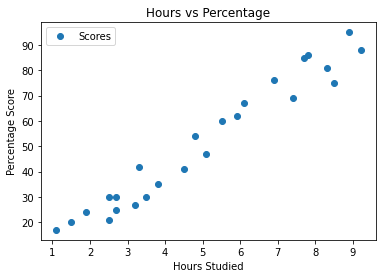

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()
''

### Подготовка данных


Следующим шагом является разделение данных на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. Мы хотим предсказать процентную оценку в зависимости от изученных часов. Поэтому наш набор атрибутов будет состоять из столбца «Часы», а меткой будет столбец «Оценка».


In [ ]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

# для этого используем iloc

Теперь, когда у нас есть атрибуты и метки, следующим шагом будет разделение этих данных на обучающий и тестовый наборы. Мы сделаем это с помощью встроенного в Scikit-Learn метода:
#### train_test_split():


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. 
#Переменная test_size -–это то место, где мы фактически указываем пропорцию набора тестов.


In [ ]:
from sklearn.linear_model import LinearRegression # импорт инейной модели
regressor = LinearRegression() # создание модели машинного обучения
regressor.fit(X_train, y_train) # тренировка модели с данными


LinearRegression()

Чтобы увидеть значение точки пересечения и наклона, вычисленное алгоритмом линейной регрессии для нашего набора данных, выполните следующий код.


In [ ]:
#Чтобы получить перехват:

print(regressor.intercept_)

2.018160041434683


In [ ]:
#Для получения наклона (коэффициента x): 
print(regressor.coef_)


[9.91065648]


Это означает, что на каждую единицу изменения в изученных часах изменение оценки составляет около 9,91%. Или, проще говоря, если студент учится на один час больше, чем готовился к экзамену ранее, он может рассчитывать на повышение на 9,91% баллов, полученных студентом ранее.


### Прогнозы 
Теперь, когда мы обучили наш алгоритм, пришло время сделать некоторые прогнозы. Для этого мы воспользуемся нашими тестовыми данными и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку.


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# сделаем таблицу, с правильными значениями и значениями, которые мы получили
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Хотя модель не очень точна, прогнозируемые проценты близки к фактическим.

### Оценка алгоритма


Средняя абсолютная ошибка (MAE) – это среднее абсолютное значение ошибок.(статистика)



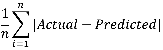

In [ ]:
from IPython.display import Image
Image("MAE.png", height = 400, width = 400)

Среднеквадратичная ошибка (MSE) – это среднее значение квадратов ошибок, которое рассчитывается как:


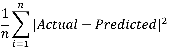

In [ ]:
from IPython.display import Image
Image("MSE.png", height = 400, width = 400)

Среднеквадратичная ошибка (RMSE) – это квадратный корень из среднего квадрата ошибок:

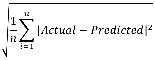

In [ ]:
from IPython.display import Image
Image("RMSE.png", height = 400, width = 400)

Давайте найдем значения этих показателей, используя наши тестовые данные

In [ ]:
from sklearn import metrics # импорт
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
